In [99]:
import requests
import pandas as pd
import pickle
import json
from datetime import datetime
import matplotlib.pyplot as plt


%store -r WORKDIR

if 'WORKDIR' not in dir():
    WORKDIR = 'C:/Users/BZ241WX/Documents/InfNet/CursoPosDataScience/mit_data_science/'


%matplotlib inline


base_url = 'http://127.0.0.1:8000/'


max_forecast_date = '2020-10-01'
model_name = 'prophet'
countrycode_list = ['US','CN','BR','IT','FR',]


pd.plotting.register_matplotlib_converters()

# Get Forecasts 

In [100]:
url = base_url + 'forecast_country/'
forecast_list = []
for code in countrycode_list:
    params={
        'countrycode': code,
        'model_name': model_name,
        'to_date': max_forecast_date
    }
    response = requests.get(url, params).json()
    df = pd.DataFrame().from_dict(response)
    df['countrycode'] = code
    forecast_list.append(df)
df_forecasts = pd.concat(forecast_list)
df_forecasts['date'] = pd.to_datetime(df_forecasts['date'], format='%Y-%m-%d')

# Top Casos estimados 

In [101]:
df_forecasts.groupby(['countrycode',]).estimated_cases.last().sort_values(ascending=False)

countrycode
US    8.034749e+06
BR    4.934789e+06
IT    2.601213e+05
FR    2.541398e+05
CN    8.756257e+04
Name: estimated_cases, dtype: float64

# Carregar dados reais 

In [102]:
url = base_url + 'measurements'
history_list = []
for code in countrycode_list:
    params={
        'countrycode': code,
    }
    response = requests.get(url, params).json()
    df = pd.DataFrame.from_dict(response)
    df['countrycode'] = code
    history_list.append(df)
df_history = pd.concat(history_list)
df_history['date'] = pd.to_datetime(df_history['date'], format='%Y-%m-%d')

# Plot da Previs√£o e do Real 

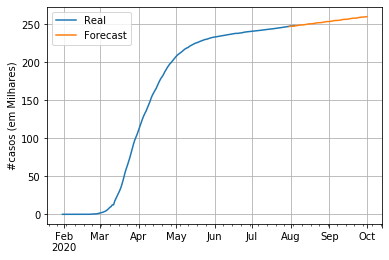

In [106]:
countrycode = 'IT'

pd.plotting.register_matplotlib_converters()

(df_history[df_history.countrycode==countrycode].groupby(['date']).cases.sum() * 1e-3).plot(label='Real')
(df_forecasts[df_forecasts.countrycode==countrycode].groupby(['date']).estimated_cases.sum() * 1e-3).plot(label='Forecast')

plt.legend()
plt.xlabel('')
plt.ylabel('#casos (em Milhares)')
plt.grid()


# Update Models 

In [104]:
# url = base_url + 'update_models/'
# response = requests.get(url)

